# Complex Steerable Pyramid

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

sys.path.append("C:/Users/esltjv/Desktop/Pers Projects/pbmm/src")

### Import the image

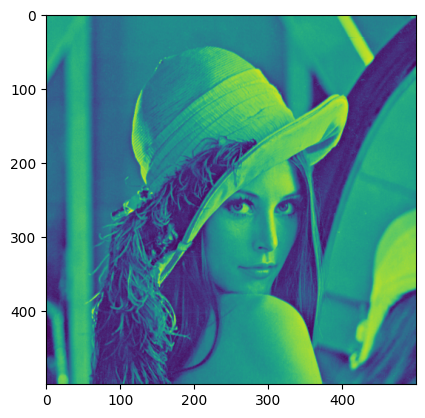

In [2]:
# image = get_test_image(512, f1)
image = cv2.imread("C:/Users/esltjv/Desktop/Pers Projects/pbmm/src/angstrom/data/testvideos/image.png")
image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
plt.imshow(image)

### Make the pyramid

In [8]:
from angstrom.pyramids.steerable_pyramid import SteerablePyramid

pyr = SteerablePyramid(depth=4, orientations=4, twidth=1.0, complex_pyr=True)

In [9]:
# get Steerable Pyramid Filters
filters, crops = pyr.get_filters(image, cropped=True)

# get Steerable Pyramid Decomposition
pyramid = pyr.build_pyramid(image, filters, crops)

# reconstruct original image DFT from pyramid decomposition
recon_dft = pyr.reconstruct_image_dft(pyramid, filters, crops)

(<Figure size 3000x2000 with 16 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object))

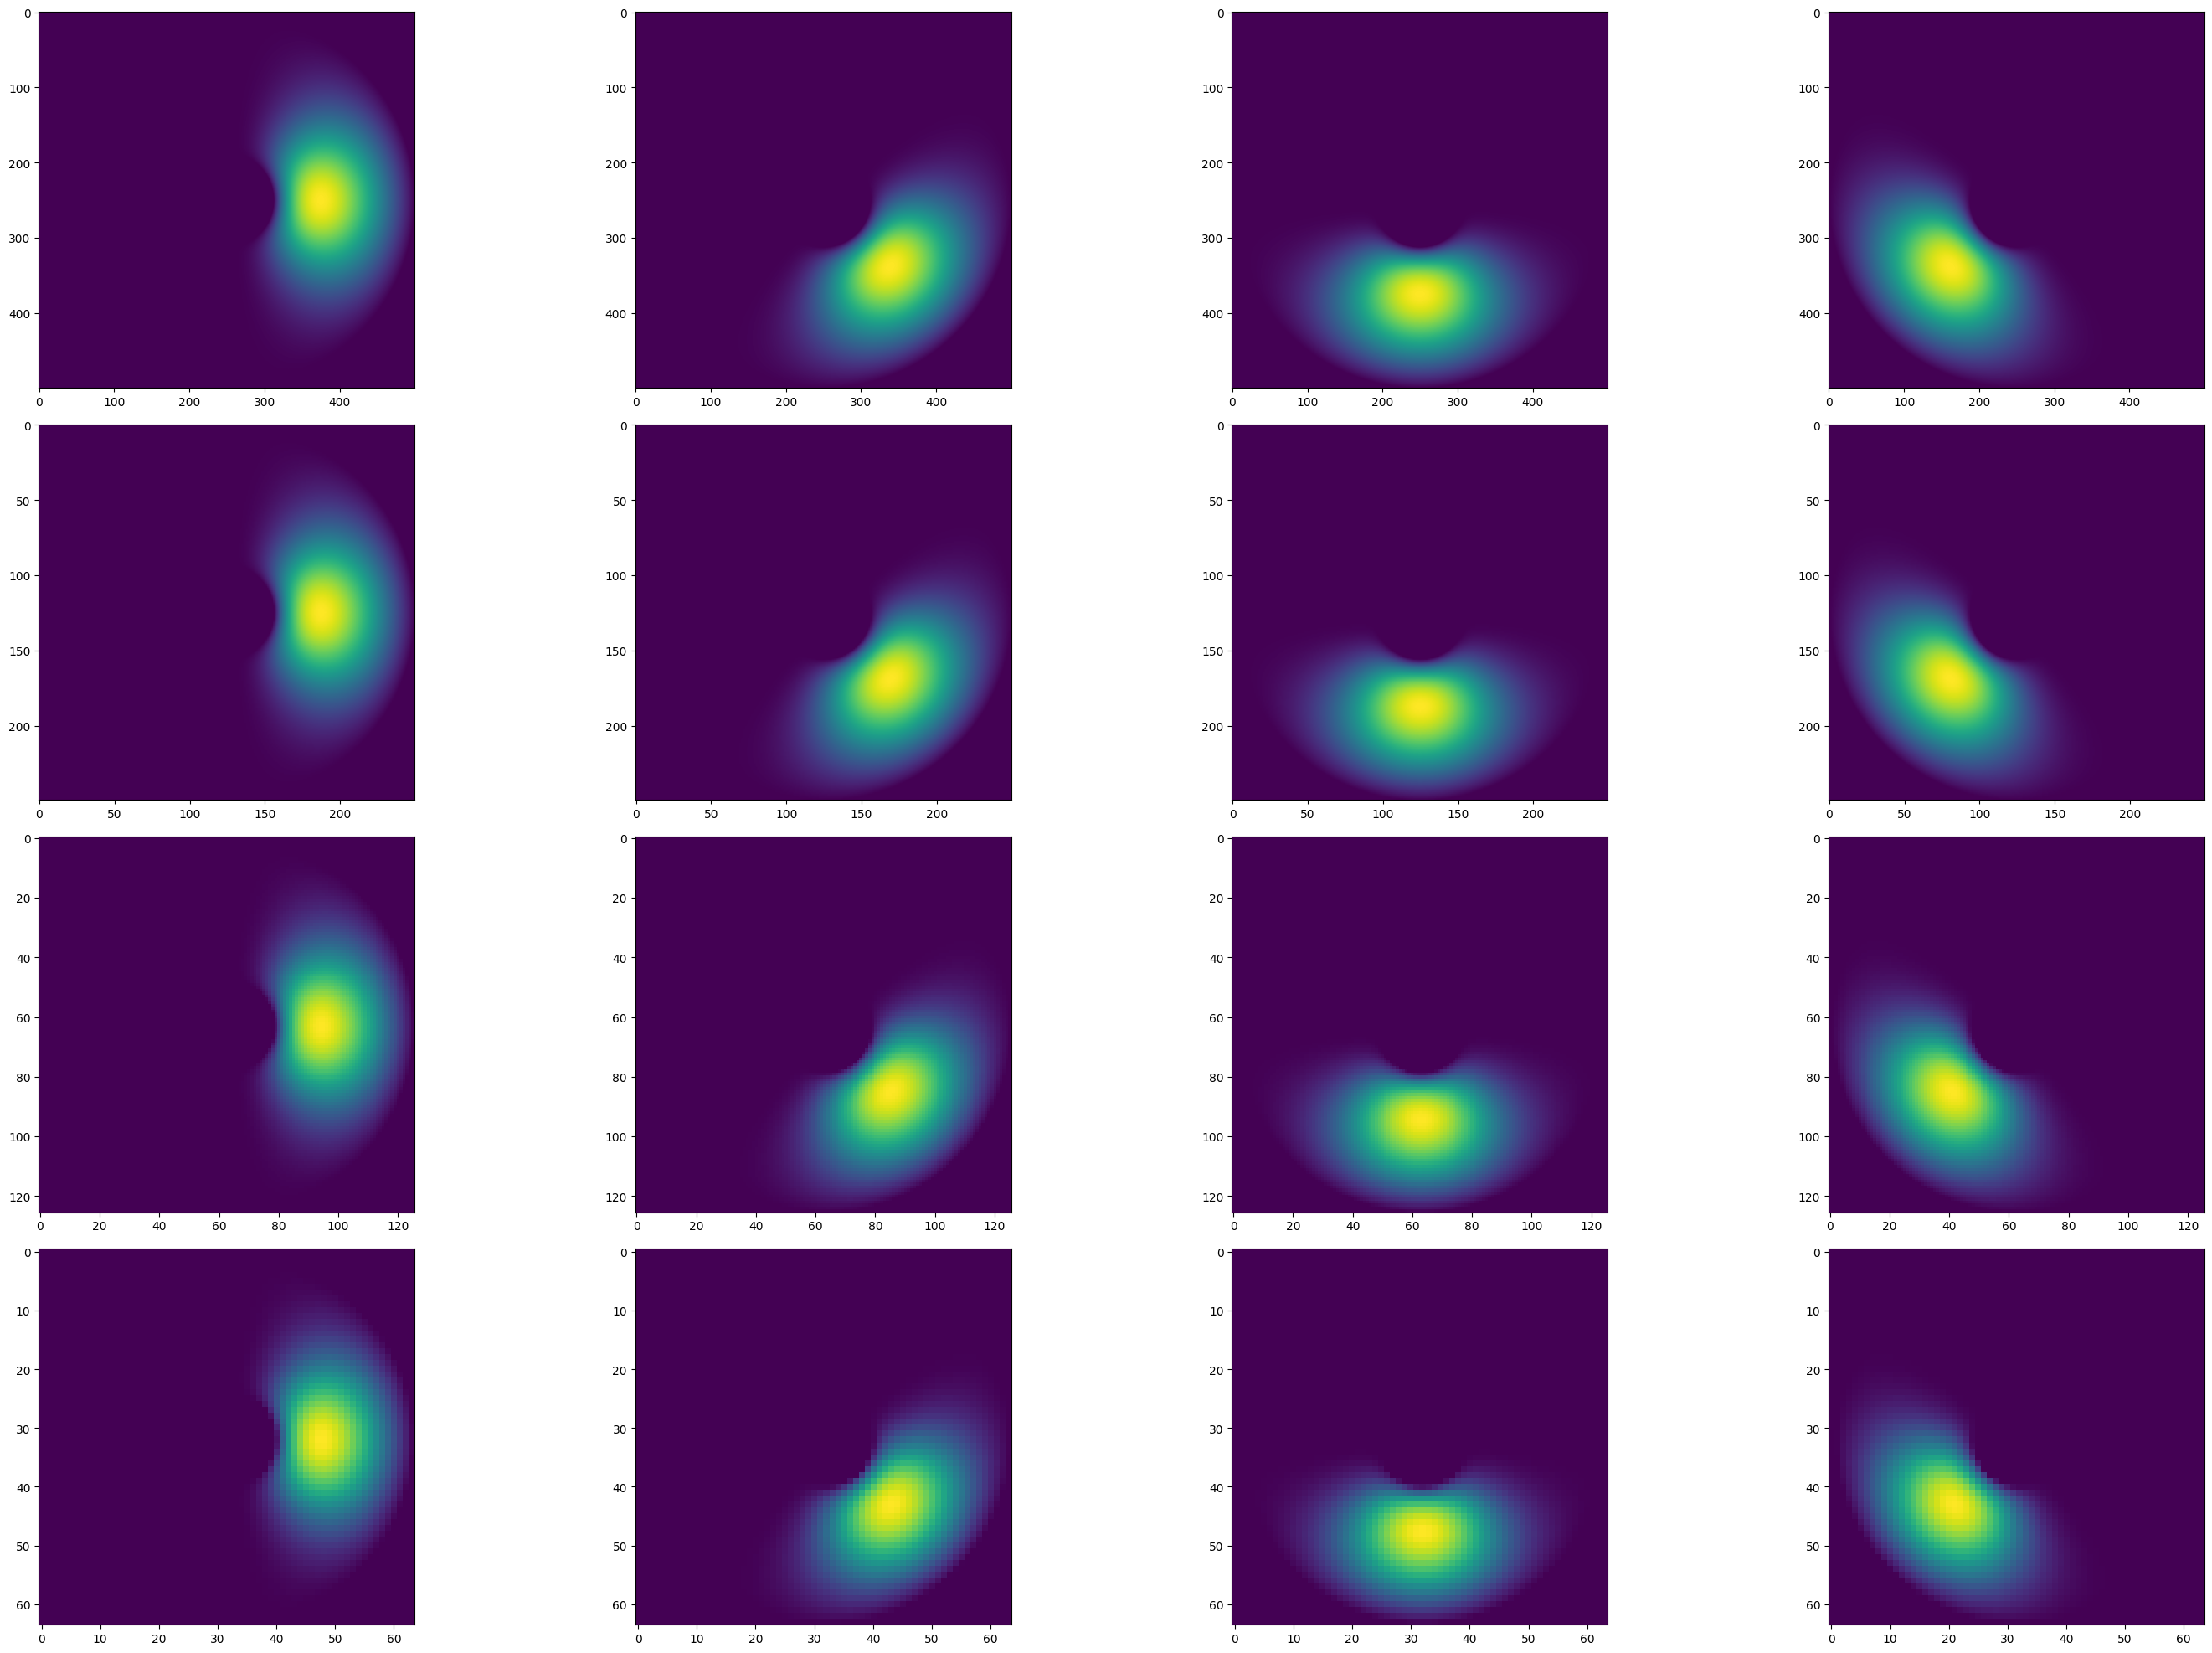

In [10]:
pyr.display(filters)

(47.33981976795825-23.05825967130707j)


(<Figure size 3000x2000 with 16 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object))

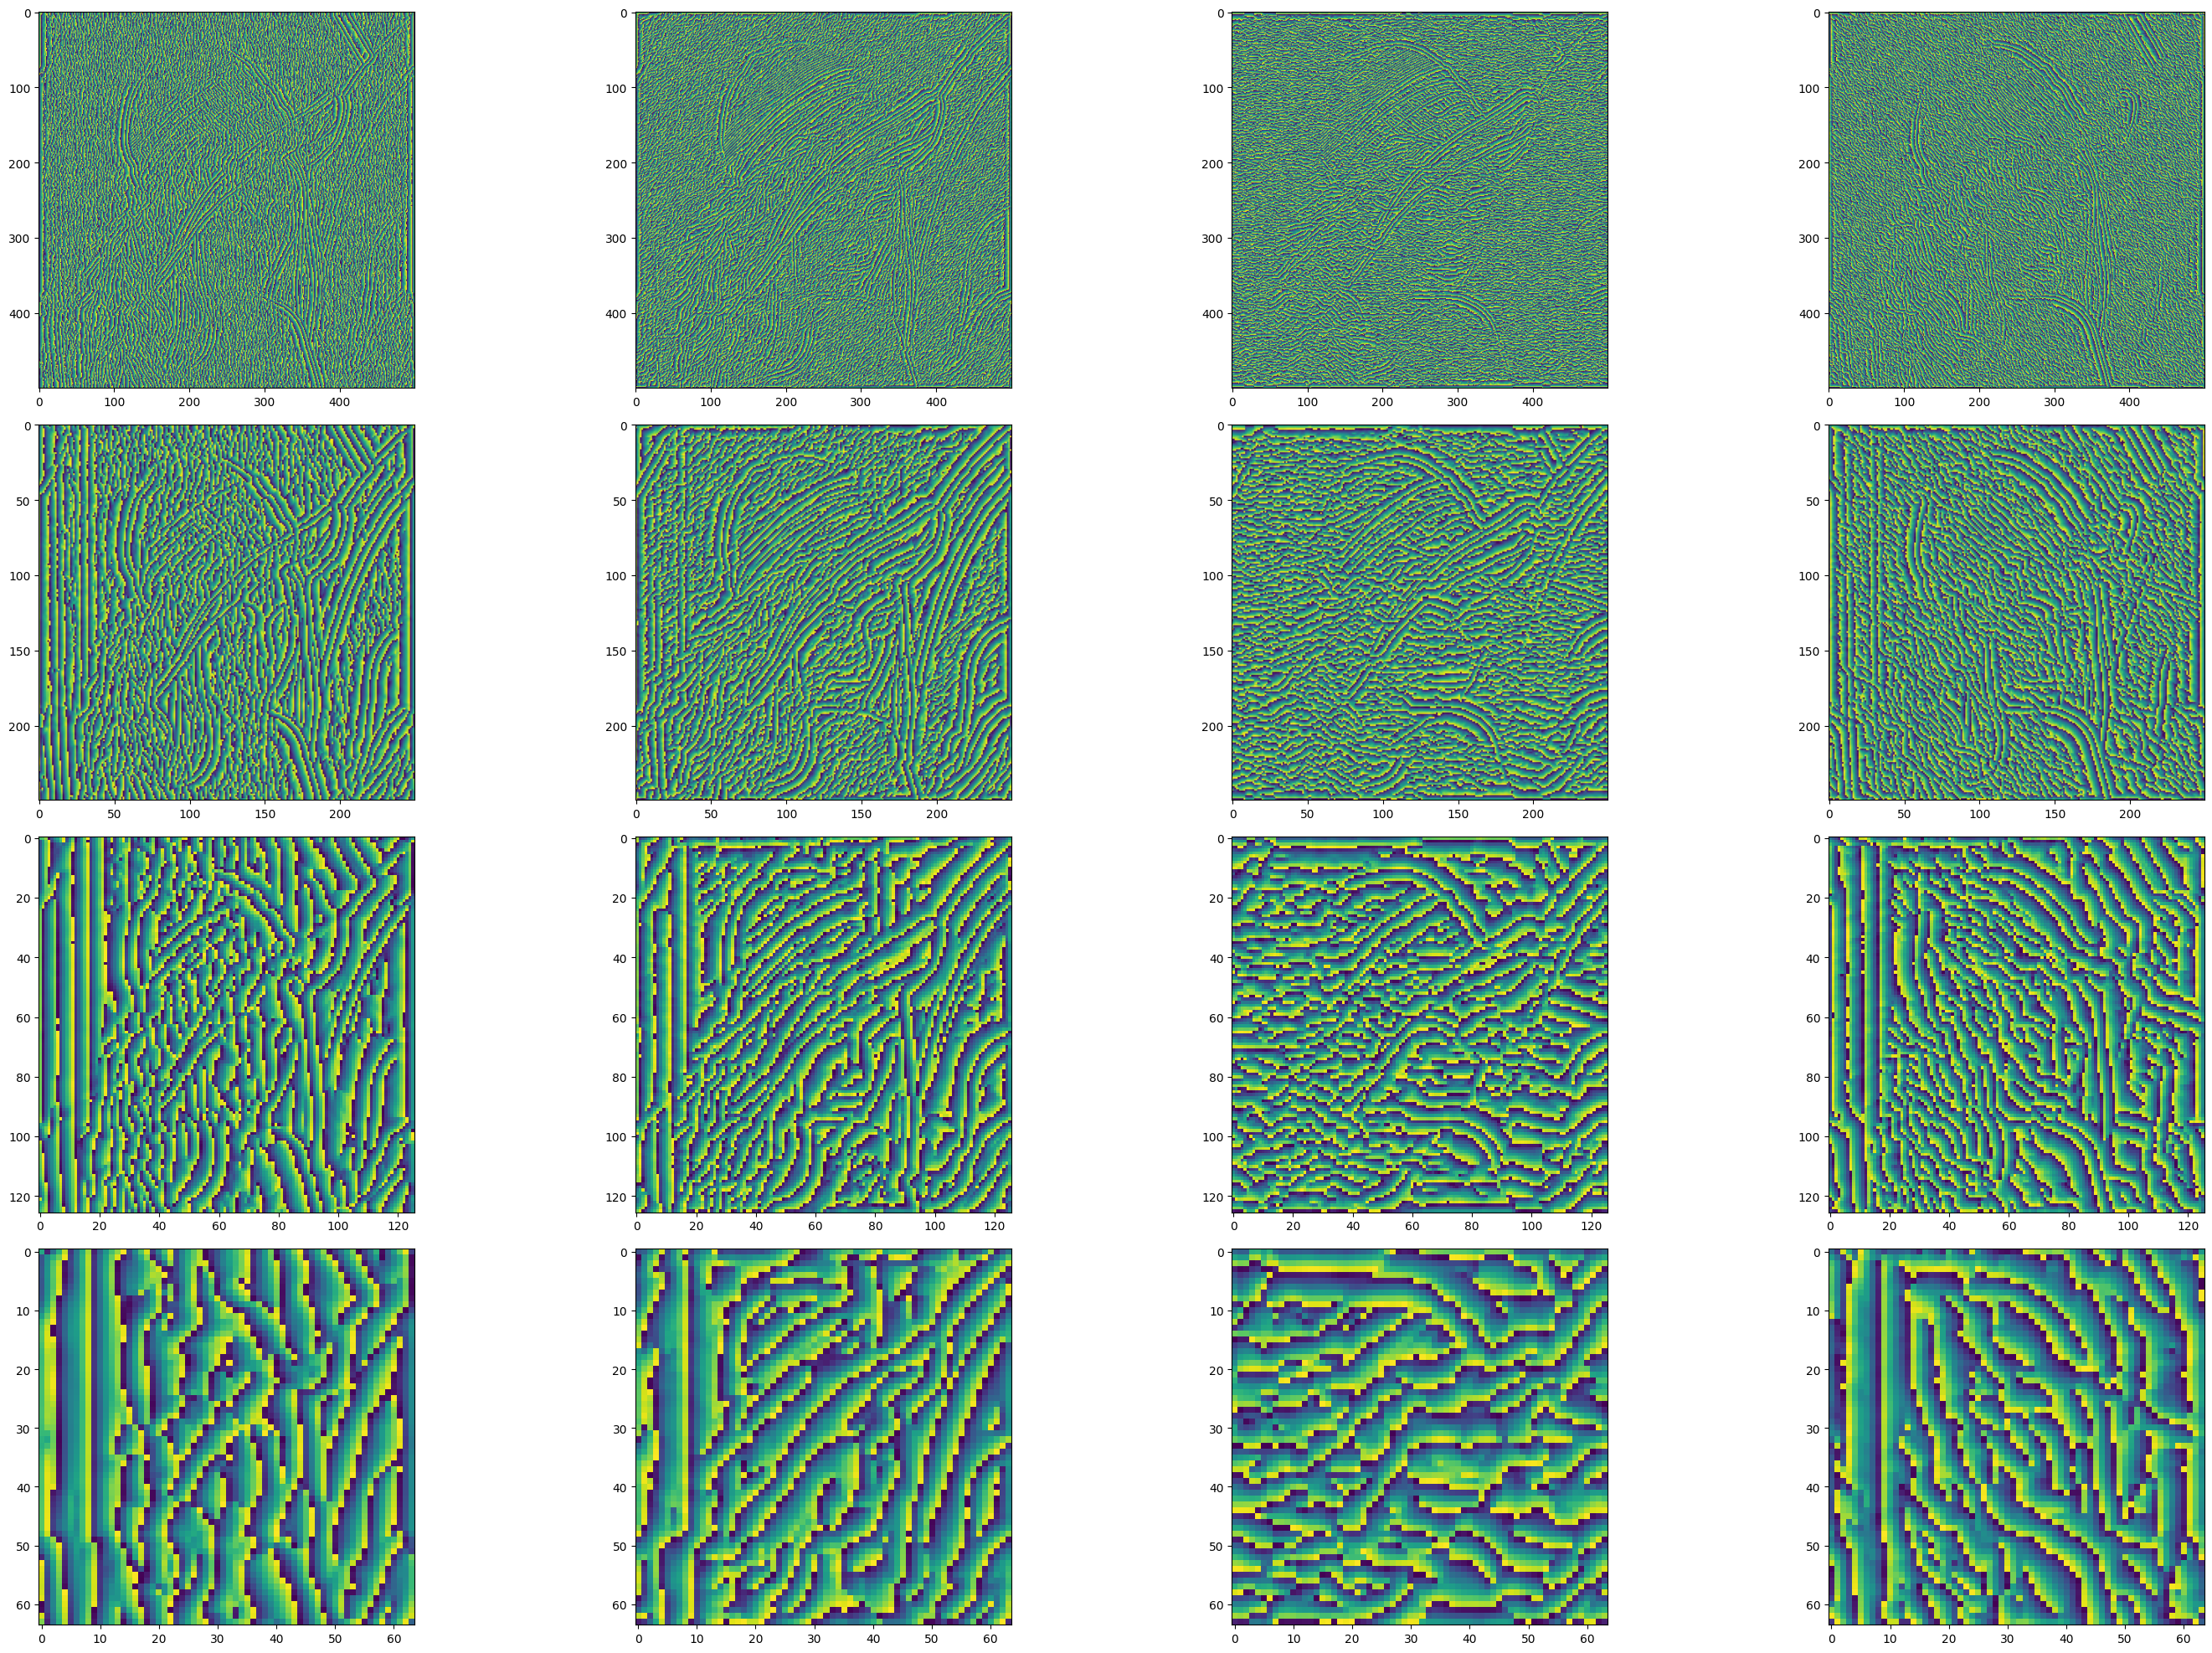

In [11]:
magnitude_pyramid = [np.abs(pyr) for pyr in pyramid]
phase_pyramid = [np.angle(pyr) for pyr in pyramid]

print(pyramid[9][50][50])
pyr.display(phase_pyramid)